In [29]:
# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder , OneHotEncoder

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    confusion_matrix,
    ConfusionMatrixDisplay
)

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier




In [2]:
data = pd.read_csv('data\weather_classification_data.csv')

In [3]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [4]:
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [5]:
data.shape

(13200, 11)

In [6]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


## seperating numerical , ordinal and categorical data

In [7]:
num_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('numerical feature : ' , num_features)
ordinal_feature = ['Cloud Cover','Weather Type']
print('ordinal feature : ',ordinal_feature)
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O' and feature not in ordinal_feature]
print('categorical feature : ',categorical_features)

numerical feature :  ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
ordinal feature :  ['Cloud Cover', 'Weather Type']
categorical feature :  ['Season', 'Location']


### using column transformer to transfor our columns

In [8]:
transformer = ColumnTransformer(
    transformers=[
        ('num' , MinMaxScaler() , num_features),
        ('cat' , OneHotEncoder() , categorical_features),
        ('ord' , OrdinalEncoder() , ordinal_feature)
    ]
)

### fitting our column transformer to our data

In [9]:
transformed_data = transformer.fit_transform(data)
transformed_columns = transformer.get_feature_names_out()
transformed_df = pd.DataFrame(transformed_data, columns=transformed_columns)

In [10]:
transformed_df.head()
transformed_columns = list(transformed_columns)

In [11]:
transformed_df.describe()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain,ord__Cloud Cover,ord__Weather Type
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,0.329310,0.547313,0.202726,0.492150,0.515442,0.286126,0.273146,0.189394,0.196818,0.188788,0.425000,0.270530,0.364848,0.364621,1.990227,1.500000
std,0.129749,0.226902,0.142448,0.293088,0.093211,0.275471,0.168575,0.391836,0.397609,0.391355,0.494362,0.444251,0.481406,0.481342,1.012302,1.118076
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.216418,0.415730,0.103093,0.174312,0.487810,0.071429,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.750000
50%,0.343284,0.561798,0.185567,0.532110,0.520008,0.214286,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.500000
75%,0.417910,0.719101,0.278351,0.752294,0.542866,0.500000,0.375000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000


- defining helper function to calculate all the classification error metrics and to plot confusion matrix


In [12]:
# defining a healper function

def evaluate_classification_model(model, X_test, y_true  ):
    # Predict the labels
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Display the metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()


In [13]:
transformed_df.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain,ord__Cloud Cover,ord__Weather Type
0,0.291045,0.595506,0.195876,0.752294,0.527951,0.142857,0.175,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0
1,0.477612,0.853933,0.175258,0.651376,0.529480,0.500000,0.500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0
2,0.410448,0.494382,0.144330,0.146789,0.547746,0.357143,0.275,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
3,0.470149,0.707865,0.030928,0.752294,0.566614,0.500000,0.050,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
4,0.388060,0.606742,0.350515,0.605505,0.477461,0.071429,0.125,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0


In [14]:
transformed_df['ord__Weather Type'] = transformed_df['ord__Weather Type'].astype(int)
transformed_df.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain,ord__Cloud Cover,ord__Weather Type
0,0.291045,0.595506,0.195876,0.752294,0.527951,0.142857,0.175,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1
1,0.477612,0.853933,0.175258,0.651376,0.529480,0.500000,0.500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0
2,0.410448,0.494382,0.144330,0.146789,0.547746,0.357143,0.275,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3
3,0.470149,0.707865,0.030928,0.752294,0.566614,0.500000,0.050,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3
4,0.388060,0.606742,0.350515,0.605505,0.477461,0.071429,0.125,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1


In [15]:
features = [feature for feature in transformed_df.columns if feature != 'ord__Weather Type']
features

['num__Temperature',
 'num__Humidity',
 'num__Wind Speed',
 'num__Precipitation (%)',
 'num__Atmospheric Pressure',
 'num__UV Index',
 'num__Visibility (km)',
 'cat__Season_Autumn',
 'cat__Season_Spring',
 'cat__Season_Summer',
 'cat__Season_Winter',
 'cat__Location_coastal',
 'cat__Location_inland',
 'cat__Location_mountain',
 'ord__Cloud Cover']

## splitting data

- splitting data into train test using train_test_split 

In [16]:
y = transformed_df['ord__Weather Type']
X = transformed_df[features]
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size=0.3 , random_state=42)

In [17]:
y.unique()

array([1, 0, 3, 2])

In [18]:
classes = [0,1,2,3]

Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 Score: 0.84


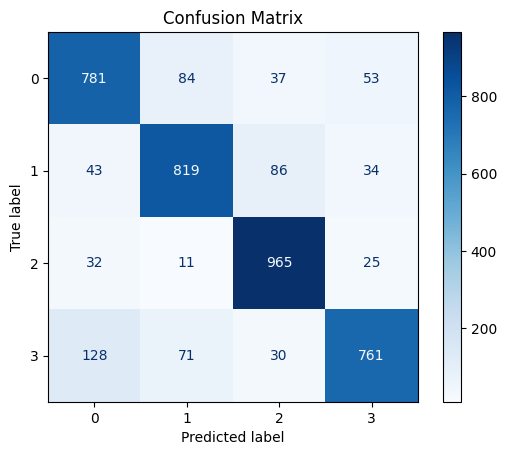

In [19]:
model = LogisticRegression(random_state=42 )
model.fit(X_train , y_train)
evaluate_classification_model(model, X_test, y_test )

- checkinh if our dataset is balanced or not

In [20]:
y.value_counts(normalize=True)

ord__Weather Type
1    0.25
0    0.25
3    0.25
2    0.25
Name: proportion, dtype: float64

### next step will be to use grid searchcv to find best parameter

In [38]:
param_grid = {
    'penalty' : ['l1' , 'l2'],
    'solver' : ['newton-cg', 'sag', 'saga' ,'lbfgs'],
    'max_iter' : [100 , 300 ,500 , 1000 , 1500 , 2000 , 2500 , 3000],
    
}

In [39]:
grid_search = GridSearchCV(estimator=model , param_grid=param_grid , scoring = 'accuracy' , cv = 4)


In [40]:
grid_search.fit(X_train ,y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(random_state=42),
             param_grid={'max_iter': [100, 300, 500, 1000, 1500, 2000, 2500,
                                      3000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']},
             scoring='accuracy')

- finding out our best parameter an storing them in dictionary to compare model perfromance

In [41]:
best_param = grid_search.best_params_
best_param

{'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [44]:
best_score = {}
best_score[grid_search.best_estimator_] = grid_search.best_score_
best_score

{LogisticRegression(penalty='l1', random_state=42, solver='saga'): np.float64(0.8534632034632035)}

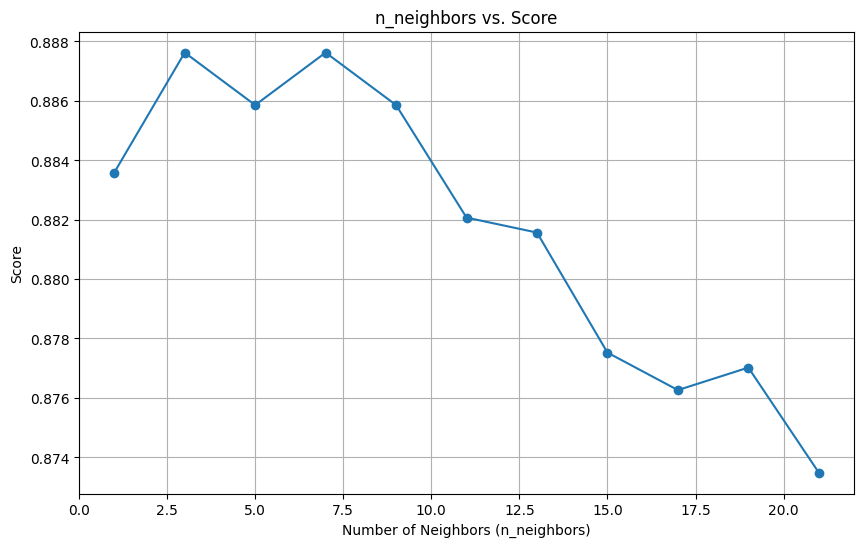

In [31]:
ac_score = []
n = range(1,22,2)
for i in n :
    model2 = KNeighborsClassifier(n_neighbors=i)
    model2.fit(X_train,y_train)
    ac_score.append(model2.score(X_test,y_test))
    
plt.figure(figsize=(10, 6))
plt.plot(n, ac_score, marker='o')
plt.title('n_neighbors vs. Score')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [32]:
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.8876262626262627

In [34]:
param_grid = {
    "n_neighbors" : [1,3,5],
    "weights" : ["uniform" , 'distance'], 
    "algorithm" : ["auto" , 'ball_tree' , 'kd_tree' , 'brute'], 
    'p' : [1,2], 
    'n_jobs' : [-1 , 1 ,2, 3, 4]
}

In [35]:
model2 = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=model2 , param_grid=param_grid , scoring = "accuracy" , cv = 4)
grid_search.fit(X_train,y_train)

d:\Projects\Weather_forcasting\venv\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': [-1, 1, 2, 3, 4], 'n_neighbors': [1, 3, 5],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [36]:
print(grid_search.best_params_)

{'algorithm': 'auto', 'n_jobs': -1, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


In [37]:
print(grid_search.best_score_)

0.8922077922077922
